At iteration :  1


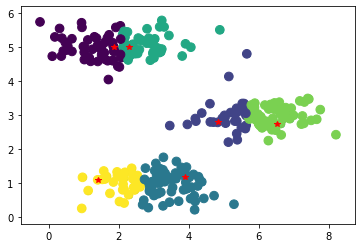

At iteration :  2


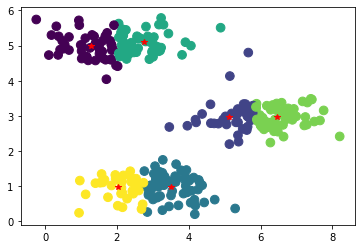

At iteration :  3


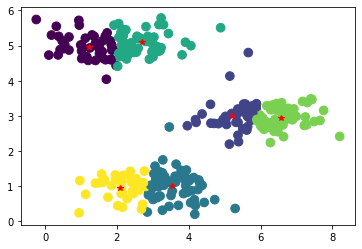

At iteration :  4


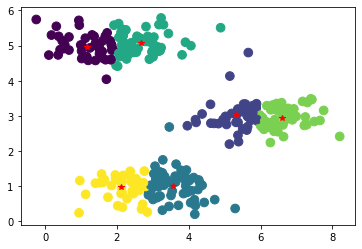

At iteration :  5


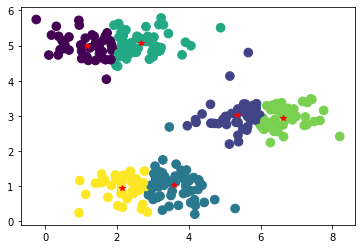

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

#reading data
data=pd.read_csv("kmeansdata.txt",delim_whitespace=True,skipinitialspace=True)
x,y=np.array(data['X']),np.array(data['Y'])

plt.scatter(x,y)
num_cluster=6  #Number of clusters
indices=random.randint(x.size-1,size=(num_cluster)) #random initlization
#disadvantage of k=3 means choose the indices below, and comment above
#indices=[79,297,10] 
x_center=np.array([x[i] for i in indices]) 
y_center=np.array([y[i] for i in indices])

def dis(x1,y1,x2,y2):
    #absolute distance function between two points, instead of squared
    return (x1-x2)**2 + (y1-y2)**2
    #return abs(x1-x2) + abs(y1-y2)
def cluster_assign(x,y,x_center,y_center,num_cluster):
    d=np.array(np.ones(x.size))
    d*=1000 #setting d=infinity
    assign=np.array(np.zeros(x.size))
    for i in range(x.size):
        for j in range(0,num_cluster):
            distance=dis(x[i],y[i],x_center[j],y_center[j])
            if(distance<d[i]):
                #for each point choosing closet centroid
                assign[i]=j
                d[i]=distance
    return assign

num_itr=5 #number of iterations for kmeans
for i in range(num_itr):
    assign=cluster_assign(x,y,x_center,y_center,num_cluster)
    assign=assign.astype(int)
    print("At iteration : ",i+1)
    #plotting kmeans 
    plt.scatter(x,y,c=assign,s=75,cmap='viridis')
    for i in range(num_cluster):
        plt.plot(x_center[i],y_center[i],'r*')
    plt.show() 
    count=np.array(np.zeros(num_cluster))
    x_c=np.array(np.zeros(num_cluster))
    y_c=np.array(np.zeros(num_cluster))
    #to move cluster centroid
    for i in range(x.size):
        x_c[assign[i]]+=x[i]
        y_c[assign[i]]+=y[i]
        count[assign[i]]+=1
    for j in range(num_cluster):
        x_c[j]/=count[j]
        y_c[j]/=count[j]
        x_center[j],y_center[j]=x_c[j],y_c[j]
        